In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical


In [2]:

max_features = 10000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
def create_model(model_type):
    model = Sequential()
    model.add(Embedding(max_features, 32, input_length=max_len))
    if model_type == 'LSTM':
       model.add(LSTM(32))
    elif model_type == 'GRU':
      model.add(GRU(32))
    elif model_type == 'RNN':
          model.add(SimpleRNN(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [4]:

model_types = ['LSTM', 'GRU', 'RNN']
histories = []

In [5]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Epoch 1/5
157/157 [==============================] - 67s 412ms/step - loss: 0.5167 - accuracy: 0.7379 - val_loss: 0.3627 - val_accuracy: 0.8372
Epoch 2/5
157/157 [==============================] - 64s 407ms/step - loss: 0.2546 - accuracy: 0.9004 - val_loss: 0.3001 - val_accuracy: 0.8762
Epoch 3/5
157/157 [==============================] - 62s 398ms/step - loss: 0.1770 - accuracy: 0.9374 - val_loss: 0.2953 - val_accuracy: 0.8780
Epoch 4/5
157/157 [==============================] - 62s 398ms/step - loss: 0.1313 - accuracy: 0.9556 - val_loss: 0.3178 - val_accuracy: 0.8798
Epoch 5/5
157/157 [==============================] - 61s 386ms/step - loss: 0.1060 - accuracy: 0.9639 - val_loss: 0.4038 - val_accuracy: 0.8784
Epoch 1/5
157/157 [==============================] - 65s 399ms/step - loss: 0.5225 - accuracy: 0.7179 - val_loss: 0.3477 - val_accuracy: 0.8526
Epoch 2/5
157/157 [==============================] - 61s 387ms/step - loss: 0.2786 - accuracy: 0.8909 - val_loss: 0.3098 - val_accuracy:

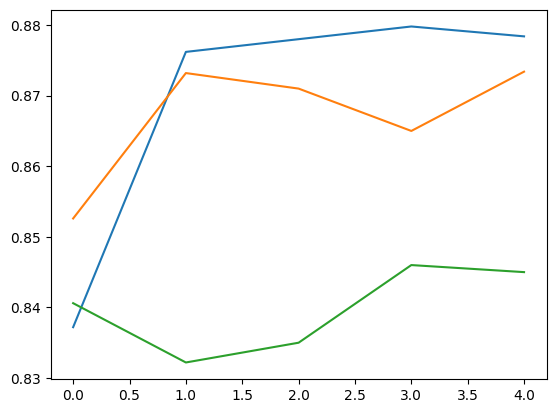

In [9]:
for model_type in model_types:
  model = create_model(model_type)
  history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)
  plt.plot(history.history['val_accuracy'], label=f'{model_type} Validation Accuracy')

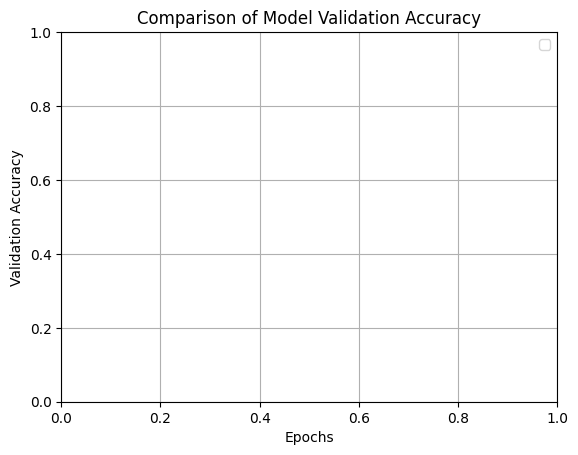

In [10]:
plt.title('Comparison of Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()